In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
from datetime import datetime
import sqlite3
import seaborn as sns
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

#### Import all 3 data sets

In [26]:
CustomerHisstory = pd.read_csv('CustomerHistory.csv', header=0)
OBCallHistory = pd.read_csv('OBCallHistory.csv', header=0)
SaleHistory = pd.read_csv('SaleHistory.csv', header=0)
CustomerHisstory.shape
OBCallHistory.shape
SaleHistory.shape

CustomerHisstory.drop_duplicates()
OBCallHistory.drop_duplicates()
SaleHistory.drop_duplicates()

# CustomerHisstory.isnull().sum().sort_values(ascending=False)
# OBCallHistory.isnull().sum().sort_values(ascending=False)
# SaleHistory.isnull().sum().sort_values(ascending=False)

CustomerHisstory.columns

(12010, 51)

(7998, 5)

(5610, 4)

,userid,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,...,ModeDeviceType,ModeVehicleType,PhoneType,ServiceProvider,AgeCategory,ClicksQuintile,InboundCallContact,accountcreationdatetime,PhoneNumber_hashed,MedianVehicleMileage
0,1,0,0,1,0,1,0,0,0,0,...,mobile,Car,PostPaid,Verizon,18-35,1,some,05FEB2018:13:48:45.56,NaN,36469.370904
1,2,0,0,1,0,0,0,0,0,0,...,desktop,Car,PostPaid,TMobile,18-35,2,all,10JAN2018:23:51:20.47,FD6E960D1EFB31AFD2E65E71A51CC9475E25BFEE74E804...,42399.404151
2,3,0,0,0,0,0,0,0,0,0,...,tablet,Van,PostPaid,Sprint,18-35,3,all,09FEB2018:06:18:08.79,CC2448A8343314DB37B67319CE78AFCC18CE92C60E0337...,42875.869050
3,4,0,1,1,0,0,0,1,0,0,...,mobile,Truck,Landline,Sprint,18-35,3,all,01JAN2018:17:33:51.52,0A47E42886E40E28D92A031457E5FF71155C160CEFBE8A...,31617.816357
4,5,0,1,1,0,1,0,0,0,0,...,tablet,Truck,PostPaid,Verizon,35-45,3,most,13JAN2018:06:31:57.81,308EAC272C9C8E0E718833956553728D3B1ABE02DD6D88...,52785.281802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12005,11668,0,1,1,0,0,0,0,0,1,...,mobile,Van,PostPaid,TMobile,18-35,1,all,30APR2018:00:26:47.64,8D5B95F720E4BCDB2B5190092CC4FDEDAB860167FCBE44...,35938.228255
12006,11669,0,1,1,0,1,0,0,0,0,...,mobile,Truck,PostPaid,Sprint,35-45,5,some,28MAR2018:09:08:04.35,561E849697003B915DDBE2F476AAFA57E5E732C50DB01B...,34528.646695
12007,11670,0,1,0,0,0,0,0,0,0,...,mobile,Truck,PostPaid,Other,45-55,1,all,21MAR2018:19:50:22.20,FA0800E8728E593A29C0D2E4D2F4BB714F61C0D917ADE5...,53700.268187
12008,11671,1,0,0,0,1,0,0,0,1,...,mobile,Car,PostPaid,Sprint,65+,5,all,05MAY2018:01:24:52.37,31C7AB62472F41F93CFBFB29F63DC7647AD0C18D38CC16...,46629.307816


,PhoneNumber_hashed,OBCallDateTime,Contacted,advocate_id,CallDuration
0,FD6E960D1EFB31AFD2E65E71A51CC9475E25BFEE74E804...,01FEB2018:10:23:10.20,1,2,0:28:11
1,CC2448A8343314DB37B67319CE78AFCC18CE92C60E0337...,13FEB2018:07:52:41.00,1,11,0:15:48
2,0A47E42886E40E28D92A031457E5FF71155C160CEFBE8A...,17JAN2018:14:00:10.29,1,13,0:23:00
3,308EAC272C9C8E0E718833956553728D3B1ABE02DD6D88...,05FEB2018:14:13:41.96,0,20,NaN
4,018F2F1107C2ADBFF7861EC337BA790B87BDFF1CCCA114...,09MAY2018:10:02:38.71,1,3,0:10:39
...,...,...,...,...,...
7993,A10C4E5FE4C1B3D46F0CA427941B7BA7149BE177D78F68...,14APR2018:11:29:00.86,0,10,NaN
7994,8D5B95F720E4BCDB2B5190092CC4FDEDAB860167FCBE44...,26MAY2018:10:28:08.79,1,14,0:08:08
7995,561E849697003B915DDBE2F476AAFA57E5E732C50DB01B...,04APR2018:15:13:25.38,1,10,0:18:58
7996,31C7AB62472F41F93CFBFB29F63DC7647AD0C18D38CC16...,09MAY2018:12:01:21.36,1,4,0:09:21


,userid,saledatetime,StickerPrice,Odometer
0,3,28FEB2018:10:06:33.17,"$28,352.27",18506
1,4,09FEB2018:00:50:44.95,"$25,145.55",13544
2,5,20FEB2018:19:58:49.75,"$28,809.16",20643
3,6,21MAR2018:11:35:48.21,"$27,561.91",12269
4,7,15MAY2018:07:21:36.45,"$28,340.72",14502
...,...,...,...,...
5605,11665,25JUN2018:09:43:30.35,"$13,494.69",12048
5606,11666,22MAY2018:14:51:10.25,"$15,238.60",14572
5607,11667,05APR2018:23:19:07.45,"$14,471.89",18342
5608,11669,21MAY2018:15:09:35.33,"$17,554.14",11266


Index(['userid', 'AttributedEmail', 'EmailVerified', 'GeneratedTerms',
       'HasBureauError', 'HasStartedPurchase', 'InboundCall', 'InboundChat',
       'InboundEmail', 'IsDealSeeker', 'IsDirtLover', 'IsDreamer', 'IsGreen',
       'IsResearcher', 'MultipleEmail', 'OutboundEmail', 'ReferralAttachment',
       'TradeInValueGenerated', 'InboundCallCount', 'InboundChatCount',
       'InboundEmailCount', 'OutboundCallCount', 'OutboundEmailCount',
       'TotalInboundCallLength', 'BureauIncome', 'CreditScore1',
       'CreditScore2', 'DeviceCount', 'FraudScore', 'Income',
       'MedianVehicleFuelEcon', 'MedianVehiclePrice', 'NumberSavedVehicles',
       'NumberSearches', 'TradeInValueAmount', 'UniqueModels',
       'VehicleVelocity1', 'VehicleVelocity15', 'VehicleVelocity30',
       'CensusGeoRegionAddress', 'LeadSource', 'ModeDeviceType',
       'ModeVehicleType', 'PhoneType', 'ServiceProvider', 'AgeCategory',
       'ClicksQuintile', 'InboundCallContact', 'accountcreationdatetime',
    

 #### Some basic data check 

45-55    3602
18-35    3087
35-45    2350
55-65    1788
65+      1183
Name: AgeCategory, dtype: int64

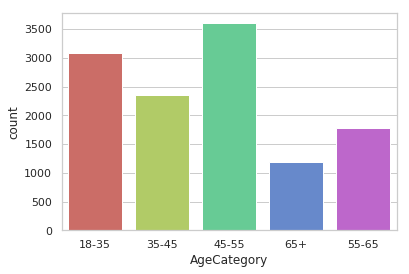

Car      3589
Truck    3576
Van      3090
SUV      1755
Name: ModeVehicleType, dtype: int64

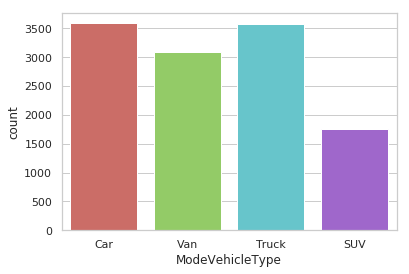

mobile     5495
desktop    3557
tablet     2958
Name: ModeDeviceType, dtype: int64

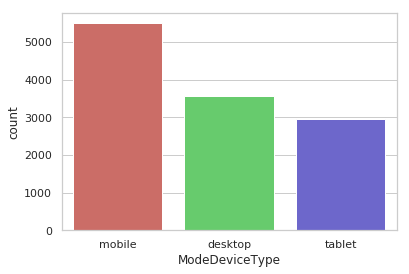

<Figure size 432x288 with 0 Axes>

In [27]:
CustomerHisstory['AgeCategory'].value_counts()
sns.countplot(x='AgeCategory',data=CustomerHisstory,palette = 'hls')
plt.show()

CustomerHisstory['ModeVehicleType'].value_counts()
sns.countplot(x='ModeVehicleType',data=CustomerHisstory,palette = 'hls')
plt.show()
plt.savefig('ModeVehicleType')

CustomerHisstory['ModeDeviceType'].value_counts()
sns.countplot(x='ModeDeviceType',data=CustomerHisstory,palette = 'hls')
plt.show()
plt.savefig('DeviceType')

### Convert timestamp into a real date,  yyyy-mm-dd

In [28]:
# Convert timestamp into a real Date format
CustomerHisstory['accountcreationdate'] = CustomerHisstory['accountcreationdatetime'].apply(lambda x: datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
CustomerHisstory.accountcreationdate = CustomerHisstory.accountcreationdate.apply(lambda x: x.date())
CustomerHisstory['accountcreationdate']=pd.to_datetime(CustomerHisstory['accountcreationdate'])
CustomerHisstory.head()

OBCallHistory['OBCallDateDate'] = OBCallHistory['OBCallDateTime'].apply(lambda x: datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
OBCallHistory.OBCallDateDate = OBCallHistory.OBCallDateDate.apply(lambda x: x.date())
OBCallHistory['OBCallDateDate']=pd.to_datetime(OBCallHistory['OBCallDateDate'])
OBCallHistory.head()


SaleHistory['saledate'] = SaleHistory['saledatetime'].apply(lambda x: datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
SaleHistory.saledate = SaleHistory.saledate.apply(lambda x: x.date())
SaleHistory['saledate']=pd.to_datetime(SaleHistory['saledate'])
SaleHistory.head()

# t = '10:15:30'
# h,m,s = t.split(':')
# print(int(datetime.timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds()))

,userid,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,...,ModeVehicleType,PhoneType,ServiceProvider,AgeCategory,ClicksQuintile,InboundCallContact,accountcreationdatetime,PhoneNumber_hashed,MedianVehicleMileage,accountcreationdate
0,1,0,0,1,0,1,0,0,0,0,...,Car,PostPaid,Verizon,18-35,1,some,05FEB2018:13:48:45.56,NaN,36469.370904,2018-02-05
1,2,0,0,1,0,0,0,0,0,0,...,Car,PostPaid,TMobile,18-35,2,all,10JAN2018:23:51:20.47,FD6E960D1EFB31AFD2E65E71A51CC9475E25BFEE74E804...,42399.404151,2018-01-10
2,3,0,0,0,0,0,0,0,0,0,...,Van,PostPaid,Sprint,18-35,3,all,09FEB2018:06:18:08.79,CC2448A8343314DB37B67319CE78AFCC18CE92C60E0337...,42875.869050,2018-02-09
3,4,0,1,1,0,0,0,1,0,0,...,Truck,Landline,Sprint,18-35,3,all,01JAN2018:17:33:51.52,0A47E42886E40E28D92A031457E5FF71155C160CEFBE8A...,31617.816357,2018-01-01
4,5,0,1,1,0,1,0,0,0,0,...,Truck,PostPaid,Verizon,35-45,3,most,13JAN2018:06:31:57.81,308EAC272C9C8E0E718833956553728D3B1ABE02DD6D88...,52785.281802,2018-01-13


,PhoneNumber_hashed,OBCallDateTime,Contacted,advocate_id,CallDuration,OBCallDateDate
0,FD6E960D1EFB31AFD2E65E71A51CC9475E25BFEE74E804...,01FEB2018:10:23:10.20,1,2,0:28:11,2018-02-01
1,CC2448A8343314DB37B67319CE78AFCC18CE92C60E0337...,13FEB2018:07:52:41.00,1,11,0:15:48,2018-02-13
2,0A47E42886E40E28D92A031457E5FF71155C160CEFBE8A...,17JAN2018:14:00:10.29,1,13,0:23:00,2018-01-17
3,308EAC272C9C8E0E718833956553728D3B1ABE02DD6D88...,05FEB2018:14:13:41.96,0,20,NaN,2018-02-05
4,018F2F1107C2ADBFF7861EC337BA790B87BDFF1CCCA114...,09MAY2018:10:02:38.71,1,3,0:10:39,2018-05-09


,userid,saledatetime,StickerPrice,Odometer,saledate
0,3,28FEB2018:10:06:33.17,"$28,352.27",18506,2018-02-28
1,4,09FEB2018:00:50:44.95,"$25,145.55",13544,2018-02-09
2,5,20FEB2018:19:58:49.75,"$28,809.16",20643,2018-02-20
3,6,21MAR2018:11:35:48.21,"$27,561.91",12269,2018-03-21
4,7,15MAY2018:07:21:36.45,"$28,340.72",14502,2018-05-15


###  <font color='Orange'> Create Master Table

In [29]:
raw_data_temp = pd.merge(left=CustomerHisstory, right=SaleHistory, on='userid', how= 'left')  
raw_data = pd.merge(left=raw_data_temp, right=OBCallHistory, on='PhoneNumber_hashed', how='left')  

In [30]:
raw_data['saledate'].fillna(value= pd.to_datetime('2099-01-01'), inplace=True)
raw_data['Saledate'] = pd.to_datetime(raw_data['saledate'])
raw_data['accountcreationdate'] = pd.to_datetime(raw_data['accountcreationdate'])
raw_data['gap'] = raw_data['Saledate'] - raw_data['accountcreationdate']
raw_data['gap'] = raw_data['gap']/np.timedelta64(1,'D')
raw_data.head(2)
# raw_data.to_csv('checkme.csv')

,userid,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,...,StickerPrice,Odometer,saledate,OBCallDateTime,Contacted,advocate_id,CallDuration,OBCallDateDate,Saledate,gap
0,1,0,0,1,0,1,0,0,0,0,...,NaN,NaN,2099-01-01,NaN,NaN,NaN,NaN,NaT,2099-01-01,29550.0
1,2,0,0,1,0,0,0,0,0,0,...,NaN,NaN,2099-01-01,01FEB2018:10:23:10.20,1.0,2.0,0:28:11,2018-02-01,2099-01-01,29576.0


###  <font color='Orange'> Create Flags, come back and check me

In [31]:
# Purchase less than 45 Days
raw_data['sold'] = np.where(raw_data['gap'] < 46, 1,0)
raw_data['Campaign'] = np.where(np.logical_and(raw_data['gap'] < 46,raw_data['OBCallDateDate'] < raw_data['saledate']),1,0)
raw_data['StickerPrice'] = raw_data['StickerPrice'].replace({'\$': '', ',': ''}, regex=True).astype(float)
raw_data['Purchase'] = np.where(raw_data['StickerPrice']> 0, 1,0)



In [32]:
d1 = raw_data['OBCallDateDate']
d2 = raw_data['saledate']
d3 = raw_data['accountcreationdate']
days_between_sales_and_call = (d2 - d1)/np.timedelta64(1,'D')
days_between_sales_and_accountcreate = (d2 - d3)/np.timedelta64(1,'D')
days_between_call_and_accountcreate = (d1 - d3)/np.timedelta64(1,'D')


conditions = [
    (days_between_call_and_accountcreate<46) & (days_between_sales_and_call>=1),
    (d1==d2) & (d2=='2099-01-01')]
choices = [1, 1]
camp_eligiable = np.select(conditions, choices, default=0)

conditions = [
    (days_between_call_and_accountcreate<46) & (raw_data['CallDuration'].isna()) ,
    (days_between_call_and_accountcreate>46),
    raw_data['Contacted']==1 & (~raw_data['CallDuration'].isna()) & (days_between_call_and_accountcreate<46),
    ]

choices = ['Attempted','Not attempted', 'Contacted']
calltype = np.select(conditions, choices, default='Not attempted')

# success sales days_between_sales_and_call>1 & days_between_sales_and_accountcreate<46
camp_success=np.where(np.logical_and(days_between_sales_and_accountcreate<46,days_between_sales_and_call>1),1,0)

raw_data['camp_eligiable']=camp_eligiable
raw_data['camp_success']=camp_success
raw_data['calltype']=calltype
raw_data.columns

raw_data.to_csv('MasterTable.csv')

Index(['userid', 'AttributedEmail', 'EmailVerified', 'GeneratedTerms',
       'HasBureauError', 'HasStartedPurchase', 'InboundCall', 'InboundChat',
       'InboundEmail', 'IsDealSeeker', 'IsDirtLover', 'IsDreamer', 'IsGreen',
       'IsResearcher', 'MultipleEmail', 'OutboundEmail', 'ReferralAttachment',
       'TradeInValueGenerated', 'InboundCallCount', 'InboundChatCount',
       'InboundEmailCount', 'OutboundCallCount', 'OutboundEmailCount',
       'TotalInboundCallLength', 'BureauIncome', 'CreditScore1',
       'CreditScore2', 'DeviceCount', 'FraudScore', 'Income',
       'MedianVehicleFuelEcon', 'MedianVehiclePrice', 'NumberSavedVehicles',
       'NumberSearches', 'TradeInValueAmount', 'UniqueModels',
       'VehicleVelocity1', 'VehicleVelocity15', 'VehicleVelocity30',
       'CensusGeoRegionAddress', 'LeadSource', 'ModeDeviceType',
       'ModeVehicleType', 'PhoneType', 'ServiceProvider', 'AgeCategory',
       'ClicksQuintile', 'InboundCallContact', 'accountcreationdatetime',
    

In [33]:
tt_camp_eligiable=sum(camp_eligiable)
tt_camp_success=sum(camp_success)
success_rate=tt_camp_success/tt_camp_eligiable
print(tt_camp_eligiable)
print(tt_camp_success)
print(success_rate)

raw_data['calltype'].unique()

7105
2365
0.33286418015482055


array(['Not attempted', 'Contacted', 'Attempted'], dtype=object)

<Figure size 2376x1656 with 0 Axes>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5]), <a list of 48 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5]), <a list of 48 Text yticklabel objects>)

(0.0, 48.0, 48.0, 0.0)

Text(0.5,1,'Correlations table')

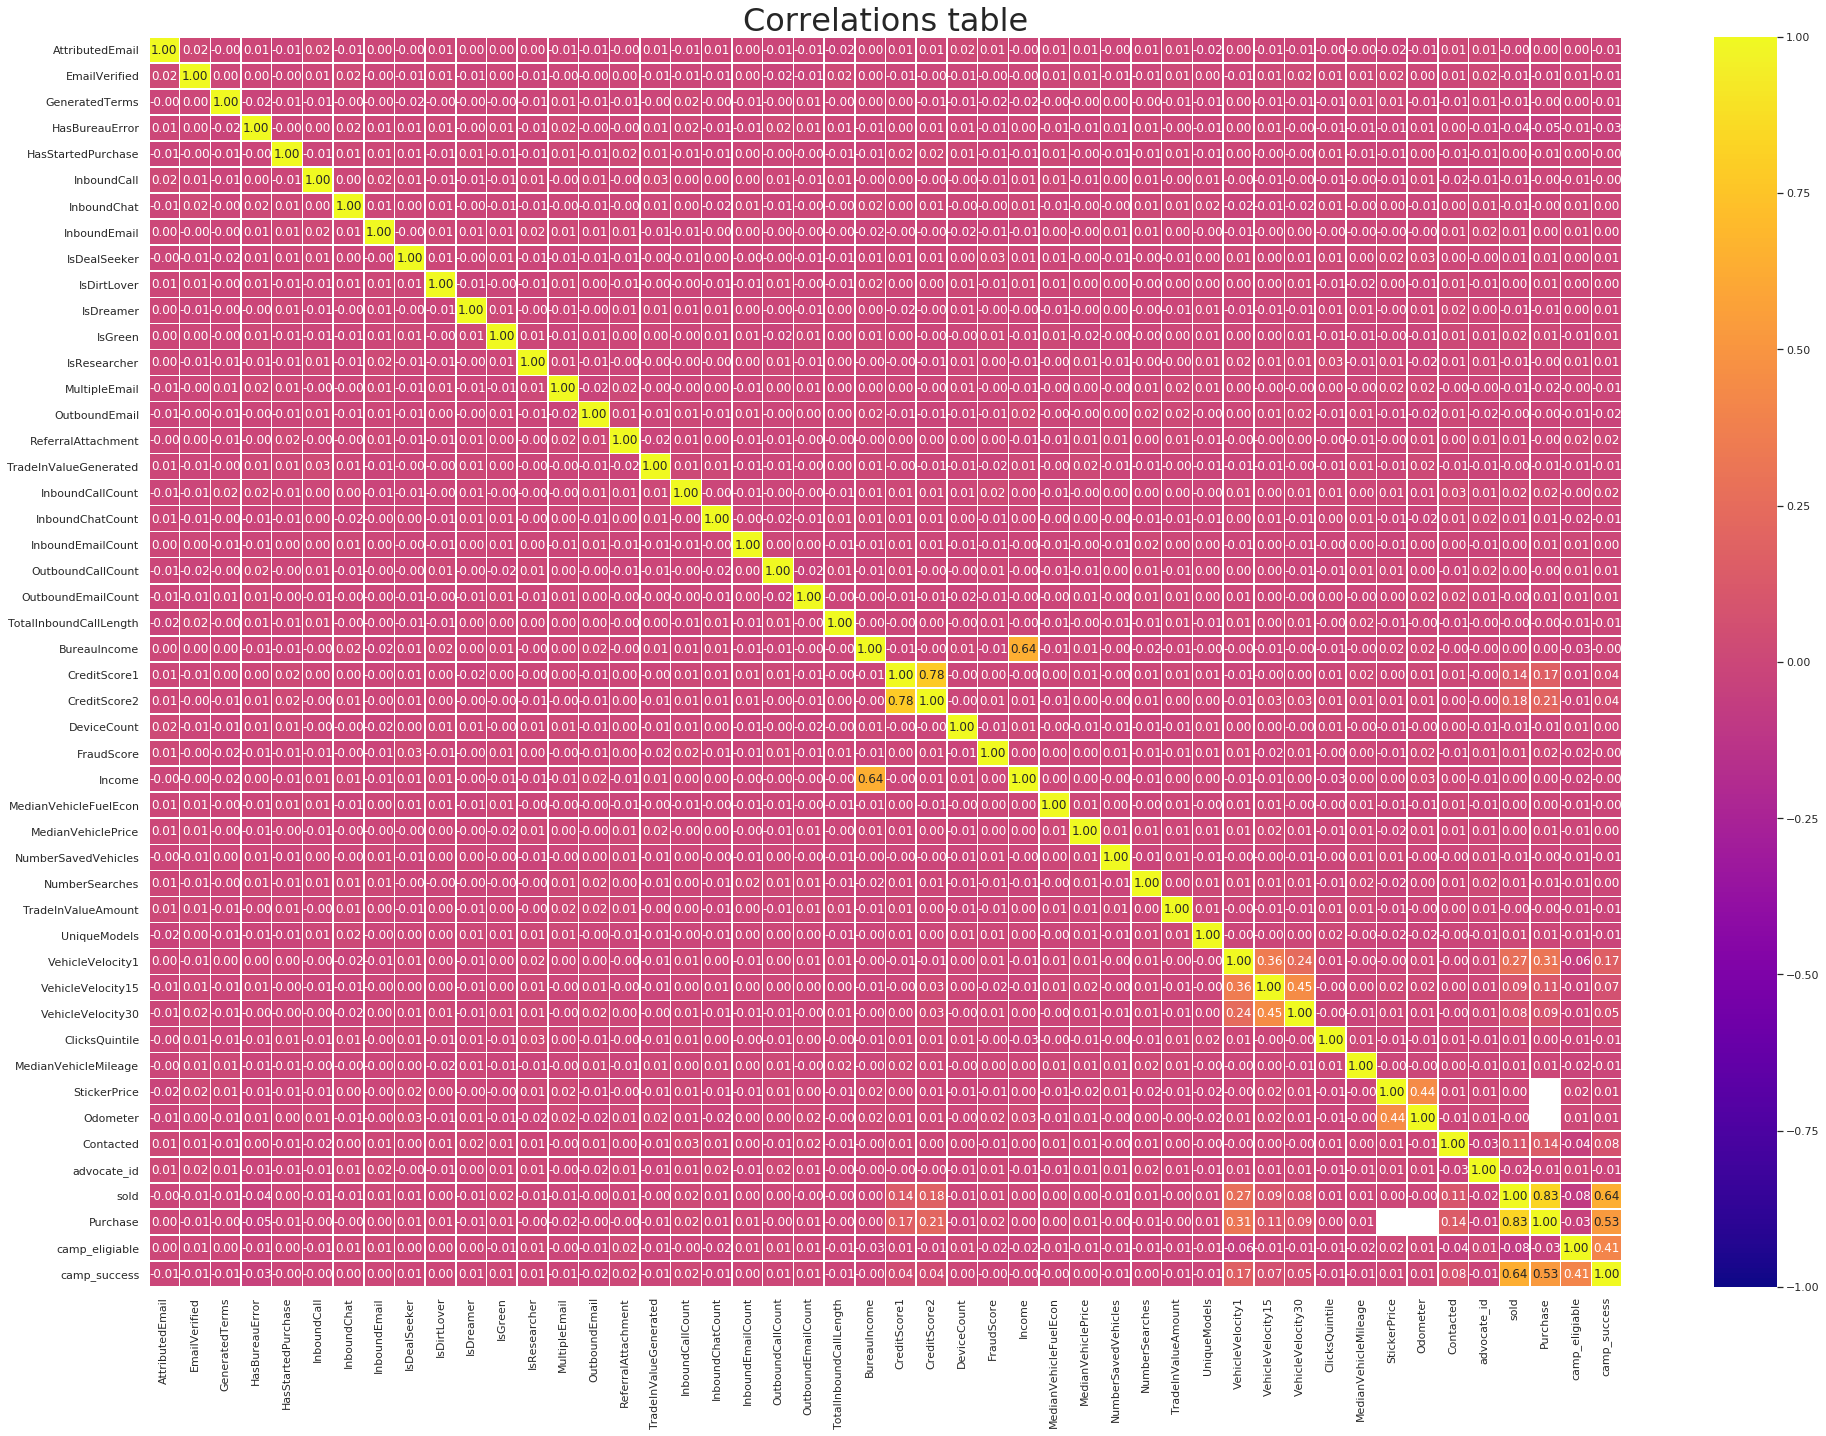

In [34]:
# Corrilation Heatmap of selected part of the data set
dfc=raw_data.drop(['userid','gap','Campaign'],axis=1).corr()
plt.figure(figsize=(33,23))
sns.heatmap(dfc,annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('tight')
plt.title('Correlations table',fontsize=32);

plt.savefig('Correlation table')

### Understand the Creditscore (1, and 2) and income (1, and 2)
### Code up the high credit customer based on their CreditScore1

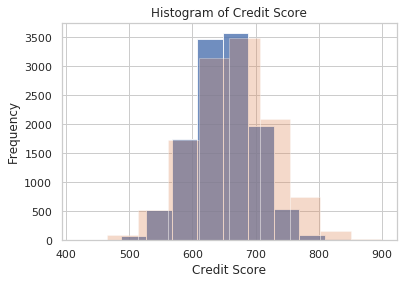

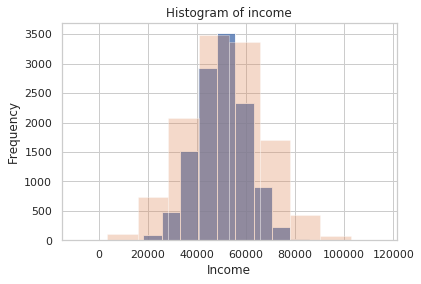

median credit score 1 : 649.0


count    12010.000000
mean     50040.388712
std      10034.817900
min      10747.858099
50%      50134.223985
80%      58392.257950
max      85516.163148
Name: BureauIncome, dtype: float64

<Figure size 432x288 with 0 Axes>

In [35]:
CustomerHisstory.CreditScore1.hist(alpha=0.8)
_ =plt.title('Histogram of Credit Score')
CustomerHisstory.CreditScore2.hist(alpha=0.3)
_ =plt.xlabel('Credit Score')
_ =plt.ylabel('Frequency')
_ =plt.show()
plt.savefig('Credit Score')

CustomerHisstory.BureauIncome.hist(alpha=0.8)
_ =plt.title('Histogram of income')
CustomerHisstory.Income.hist(alpha=0.3)
_ =plt.xlabel('Income')
_ =plt.ylabel('Frequency')
_ =plt.show()
plt.savefig('income')


# Mediam point of CreditScore1
# 80th percentile of BureauIncome
print('median credit score 1 :', raw_data['CreditScore1'].median())
raw_data['BureauIncome'].describe(percentiles = [0.8])


###  <font color='Blue'> RESET the cutoff value to re-test our Hypothesis

In [36]:
Credit_score_cut_off = 649
income_cut_off = 58392

raw_data['high_credit'] = np.where(raw_data['CreditScore1'] > Credit_score_cut_off ,1,0)
# raw_data.groupby(['high_credit', 'CreditScore1']).mean()

raw_data['high_income'] = np.where(raw_data['BureauIncome'] > income_cut_off ,1,0)
# raw_data.groupby(['high_income', 'BureauIncome']).mean()

raw_data.to_csv('MasterTable.csv')

g1 = raw_data.groupby(['calltype']).mean()
g1.to_csv('group_compare.csv')


In [37]:
data_vars=raw_data.columns.values.tolist()
print(data_vars)

Feature_set = [ 'AttributedEmail', 'GeneratedTerms', 'HasBureauError', 'HasStartedPurchase', 'InboundCall', 'InboundChat', 'InboundEmail', 
                       'IsDealSeeker', 'IsDirtLover', 'IsDreamer', 'IsGreen', 'IsResearcher', 'MultipleEmail', 'OutboundEmail', 'ReferralAttachment', 'TradeInValueGenerated',
                       'InboundCallCount', 'InboundChatCount', 'InboundEmailCount', 'OutboundCallCount', 'OutboundEmailCount', 'TotalInboundCallLength', 'BureauIncome', 'CreditScore1', 
                       'DeviceCount', 'FraudScore', 'Income', 'MedianVehicleFuelEcon', 'MedianVehiclePrice', 'NumberSavedVehicles', 'NumberSearches',
                       'TradeInValueAmount', 'UniqueModels', 'VehicleVelocity1', 'VehicleVelocity15', 'VehicleVelocity30', 'CensusGeoRegionAddress', 
                       'LeadSource', 'ModeDeviceType', 'ModeVehicleType', 'PhoneType', 'ServiceProvider', 'AgeCategory', 'ClicksQuintile', 'InboundCallContact',
                        'MedianVehicleMileage', 'Contacted', 'sold', 'high_credit', 'high_income']

final_data = raw_data[Feature_set]
# final_data.head(2)


y = final_data['sold']
y.shape
x = final_data.drop(['sold'], axis=1)
X = x.fillna(0)
X.head(2)

Feature_set_CP_GB=X.columns.values.tolist()
print(Feature_set_CP_GB)

raw_data.head()

['userid', 'AttributedEmail', 'EmailVerified', 'GeneratedTerms', 'HasBureauError', 'HasStartedPurchase', 'InboundCall', 'InboundChat', 'InboundEmail', 'IsDealSeeker', 'IsDirtLover', 'IsDreamer', 'IsGreen', 'IsResearcher', 'MultipleEmail', 'OutboundEmail', 'ReferralAttachment', 'TradeInValueGenerated', 'InboundCallCount', 'InboundChatCount', 'InboundEmailCount', 'OutboundCallCount', 'OutboundEmailCount', 'TotalInboundCallLength', 'BureauIncome', 'CreditScore1', 'CreditScore2', 'DeviceCount', 'FraudScore', 'Income', 'MedianVehicleFuelEcon', 'MedianVehiclePrice', 'NumberSavedVehicles', 'NumberSearches', 'TradeInValueAmount', 'UniqueModels', 'VehicleVelocity1', 'VehicleVelocity15', 'VehicleVelocity30', 'CensusGeoRegionAddress', 'LeadSource', 'ModeDeviceType', 'ModeVehicleType', 'PhoneType', 'ServiceProvider', 'AgeCategory', 'ClicksQuintile', 'InboundCallContact', 'accountcreationdatetime', 'PhoneNumber_hashed', 'MedianVehicleMileage', 'accountcreationdate', 'saledatetime', 'StickerPrice', 

(12010,)

,AttributedEmail,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,IsDirtLover,IsDreamer,...,ModeVehicleType,PhoneType,ServiceProvider,AgeCategory,ClicksQuintile,InboundCallContact,MedianVehicleMileage,Contacted,high_credit,high_income
0,0,1,0,1,0,0,0,0,0,0,...,Car,PostPaid,Verizon,18-35,1,some,36469.370904,0.0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,Car,PostPaid,TMobile,18-35,2,all,42399.404151,1.0,0,0


['AttributedEmail', 'GeneratedTerms', 'HasBureauError', 'HasStartedPurchase', 'InboundCall', 'InboundChat', 'InboundEmail', 'IsDealSeeker', 'IsDirtLover', 'IsDreamer', 'IsGreen', 'IsResearcher', 'MultipleEmail', 'OutboundEmail', 'ReferralAttachment', 'TradeInValueGenerated', 'InboundCallCount', 'InboundChatCount', 'InboundEmailCount', 'OutboundCallCount', 'OutboundEmailCount', 'TotalInboundCallLength', 'BureauIncome', 'CreditScore1', 'DeviceCount', 'FraudScore', 'Income', 'MedianVehicleFuelEcon', 'MedianVehiclePrice', 'NumberSavedVehicles', 'NumberSearches', 'TradeInValueAmount', 'UniqueModels', 'VehicleVelocity1', 'VehicleVelocity15', 'VehicleVelocity30', 'CensusGeoRegionAddress', 'LeadSource', 'ModeDeviceType', 'ModeVehicleType', 'PhoneType', 'ServiceProvider', 'AgeCategory', 'ClicksQuintile', 'InboundCallContact', 'MedianVehicleMileage', 'Contacted', 'high_credit', 'high_income']


,userid,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,...,Saledate,gap,sold,Campaign,Purchase,camp_eligiable,camp_success,calltype,high_credit,high_income
0,1,0,0,1,0,1,0,0,0,0,...,2099-01-01,29550.0,0,0,0,0,0,Not attempted,1,0
1,2,0,0,1,0,0,0,0,0,0,...,2099-01-01,29576.0,0,0,0,1,0,Contacted,0,0
2,3,0,0,0,0,0,0,0,0,0,...,2018-02-28,19.0,1,1,1,1,1,Contacted,0,0
3,4,0,1,1,0,0,0,1,0,0,...,2018-02-09,39.0,1,1,1,1,1,Contacted,0,0
4,5,0,1,1,0,1,0,0,0,0,...,2018-02-20,38.0,1,1,1,1,1,Attempted,1,0


In [38]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
# One-hot encode the data using pandas get_dummies
X = pd.get_dummies(X)
# Display the first 5 rows of the last 12 columns
X.iloc[:,5:].head(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
test = pd.DataFrame(data=X)
test.head(2)

,InboundChat,InboundEmail,IsDealSeeker,IsDirtLover,IsDreamer,IsGreen,IsResearcher,MultipleEmail,OutboundEmail,ReferralAttachment,...,ServiceProvider_Verizon,AgeCategory_18-35,AgeCategory_35-45,AgeCategory_45-55,AgeCategory_55-65,AgeCategory_65+,InboundCallContact_all,InboundCallContact_most,InboundCallContact_none,InboundCallContact_some
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0


,AttributedEmail,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,IsDirtLover,IsDreamer,...,ServiceProvider_Verizon,AgeCategory_18-35,AgeCategory_35-45,AgeCategory_45-55,AgeCategory_55-65,AgeCategory_65+,InboundCallContact_all,InboundCallContact_most,InboundCallContact_none,InboundCallContact_some
0,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


##  <font color='Orange'> GradientBoosting, fun start :)

In [40]:
learning_date_list = [ 0.1, 0.25, 0.5, 0.75]

for learning_rate in learning_date_list:
    gb_clf = GradientBoostingClassifier(n_estimators=25, learning_rate=learning_rate, max_features=30, max_depth=4, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=30, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.1
Accuracy score (training): 0.712
Accuracy score (validation): 0.700


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=4,
                           max_features=30, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.25
Accuracy score (training): 0.736
Accuracy score (validation): 0.698


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=4,
                           max_features=30, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.5
Accuracy score (training): 0.764
Accuracy score (validation): 0.685


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.75, loss='deviance', max_depth=4,
                           max_features=30, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Learning rate:  0.75
Accuracy score (training): 0.766
Accuracy score (validation): 0.677


### As expected, The learning rate yield best results around 0.1 we will implement that into the model

In [41]:
gb_clf2 = GradientBoostingClassifier(n_estimators=25, learning_rate=0.25, max_features=20, max_depth=4, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


predictions_series = pd.Series(predictions)
Result1 = pd.concat([predictions_series], axis=1)
Result2 = pd.concat([y_test], axis=1)
Result1.to_csv('Prediction_GB.csv')
Result2.to_csv('Holdout_GB.csv')


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=4,
                           max_features=20, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=25,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Confusion Matrix:
[[1905  339]
 [ 742  617]]
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      2244
           1       0.65      0.45      0.53      1359

    accuracy                           0.70      3603
   macro avg       0.68      0.65      0.66      3603
weighted avg       0.69      0.70      0.69      3603



<Figure size 720x864 with 0 Axes>

Text(0.5,0,'Feature Importance Score')

Text(0,0.5,'Features')

Text(0.5,1,'Important Features (xgb_clf)')

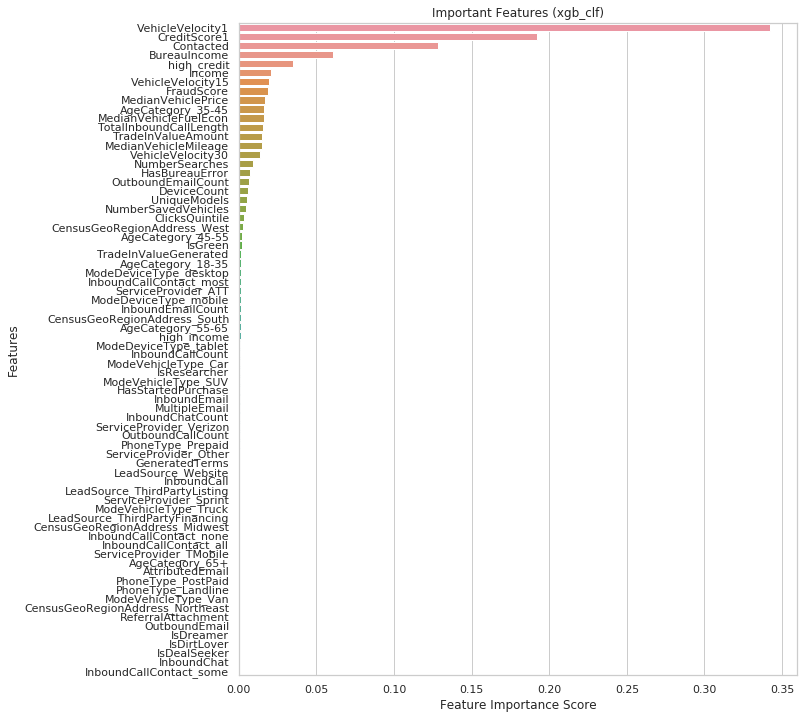

In [42]:
colx = [X_train.columns[x] for x in range(X_train.shape[1])]
feature_imp = pd.Series(gb_clf2.feature_importances_, index = colx).sort_values(ascending=False)[:120]
plt.figure(figsize=(10,12))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features (xgb_clf)');

plt.savefig('Feature Importance Score')